<a href="https://colab.research.google.com/github/H-lamba/Machine-Learning-Projects/blob/main/Plant_disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2'.
There are 1 directories and 0 images in '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)'.
There are 2 directories and 0 images in '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'.
There are 38 directories and 0 images in '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'.
There are 0 directories and 490 images in '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus'.
There are 0 directories and 477 images in '/root/.cache/kagglehub

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
#class_names = class_names[:]
print(class_names)

['00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
 '01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'
 '01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG' ...
 'ff99efdc-a9f8-4360-9c64-f8274f456be5___FREC_Scab 3161_270deg.JPG'
 'ff99efdc-a9f8-4360-9c64-f8274f456be5___FREC_Scab 3161_90deg.JPG'
 'ff99efdc-a9f8-4360-9c64-f8274f456be5___FREC_Scab 3161_new30degFlipLR.JPG']


In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Dieseas Dataset(Augumented)")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[:] # remove .DS_store
print(class_names)

[]


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['2bc50b52-0d7d-41a3-be8a-8d070341d87f___FREC_Scab 3476_270deg.JPG']
Image shape: (256, 256, 3)
['5cd3df15-31a2-4076-9d1a-8735fa1dccdf___FREC_Scab 3410_90deg.JPG']
Image shape: (256, 256, 3)
['f2391b26-b388-4ffc-b735-9b8d859d1ffa___FREC_Scab 3312.JPG']
Image shape: (256, 256, 3)
['cf1d9afc-3473-4c97-ae0b-6f2352d9d595___FREC_Scab 3457_90deg.JPG']
Image shape: (256, 256, 3)
['dbf6dab4-0765-454c-8cb9-6b4329bca971___FREC_Scab 3225_new30degFlipLR.JPG']
Image shape: (256, 256, 3)


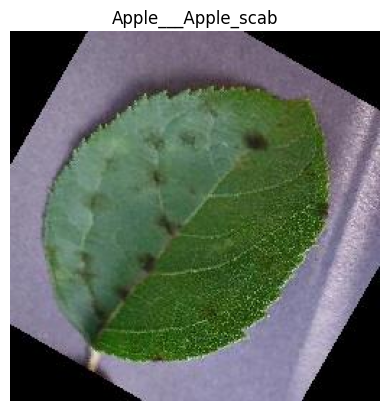

In [ ]:
# View a random image from the training dataset
for i in range(5):
    img = view_random_image(target_dir="/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/",
                        target_class="Apple___Apple_scab")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
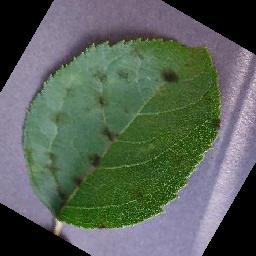

In [ ]:
img

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
img/255.

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
train_dir = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_dir = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test"
train_dir2 = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir2 = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)
valid_datagen = ImageDataGenerator(rescale = 1/255.)


In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
target_size= (256,256),
batch_size= 32)


Found 70295 images belonging to 38 classes.


In [ ]:
valid_data = train_datagen.flow_from_directory(directory= valid_dir,
target_size  = (256,256),
batch_size= 32)
test_data = train_datagen.flow_from_directory(directory= test_dir,
target_size  = (256,256),
batch_size= 32)

Found 17572 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


In [ ]:
len(train_data) ## 70295/32

2197

In [ ]:
70295/32

2196.71875

In [ ]:
## This is our Baseline Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model_1 = Sequential([
    Conv2D(filters = 10,
    kernel_size= (3,3),
    strides= (1,1),
    padding = 'valid',
    activation = 'relu',
    input_shape=(256,256,3)),
    Conv2D(10,3,activation= 'relu'),
    Conv2D(10,3,activation= 'relu'),
    Flatten(),
    Dense(38,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#opt = tf.keras.optimizers.SGD(lr= 0.001, momentum = 0.9)
model_1.compile(loss = 'categorical_crossentropy',
optimizer= Adam(),
metrics= ['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 252, 252, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 250, 250, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 625000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 38)                  │      23,750,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,752,138 (90.61 MB)

 Trainable params: 23,752,138 (90.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data), len(valid_data)

NameError: name 'train_data' is not defined

In [ ]:
history1 = model_1.fit(train_data,
                        epochs = 5,
                        validation_data=valid_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 213s 93ms/step - accuracy: 0.5361 - loss: 2.1339 - val_accuracy: 0.7987 - val_loss: 0.6674
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 283s 106ms/step - accuracy: 0.9438 - loss: 0.1939 - val_accuracy: 0.7683 - val_loss: 0.9025
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 272s 123ms/step - accuracy: 0.9853 - loss: 0.0507 - val_accuracy: 0.7116 - val_loss: 1.3328
Epoch 4/5
1716/2197 ━━━━━━━━━━━━━━━━━━━━ 1:16 159ms/step - accuracy: 0.9902 - loss: 0.0360

In [ ]:
import pandas as pd
pd.DataFrame(history1.history).plot(figsize = (10,7))

In [ ]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label = "training loss")
    plt.plot(epochs, val_loss , label = "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs,accuracy, label = "training accuracy ")
    plt.plot(epochs,val_accuracy, label = "val_accuracy ")
    plt.title("accuracy")
    plt.xlabel("epcohs")
    plt.legend()

In [ ]:
plot_loss_curves(history1)

In [ ]:
model_2 = Sequential([
    Conv2D(filters = 10,
    kernel_size= (3,3),
    strides= (1,1),
    padding = 'valid',
    activation = 'relu',
    input_shape=(256,256,3)),
    Conv2D(10,3,activation= 'relu'),

    Conv2D(10,3,activation= 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(38,activation='softmax')
])

In [ ]:
model_2.summary()

In [ ]:
model2.compile(loss = "categorical_crossentropy",
               optimizer = Adam(),
               metrics = ["accuracy"])

In [ ]:
history2 = model_2.fit(train_data, epochs = 5, validation_data = valid_data)

In [ ]:
import pandas as pd
pd.DataFrame(history2.history).plot(figsize = (10,7))

In [ ]:
plot_loss_curves(history2)

In [ ]:
model3 = Sequential([
    Conv2D(32,(3,3), activation = 'relu' , padding = 'same', input_shape = (256,256,3)),
    Conv2D(32,(3,3), activation = 'relu' , padding = 'same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(38, activation = 'softmax')
])

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model3, to_file = 'model3.png')

In [ ]:
model3.summary()

In [ ]:
model3.compile(loss = 'categorical_crossentropy',
               optimizer = Adam(),
               metrics  = ['Accuracy'])

In [ ]:
history3 = model3.fit(train_data, epochs = 5, validation_data = valid_data)